### Import necessary modules

In [15]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
import keras

In [16]:
# data = np.load('./mnist.npz')

# x_train = data['x_train']

### Display loaded data

In [17]:
def display_img(img_set, title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(3, 5, i + 1)
    plt.imshow(img_set[i], cmap = 'gray')
    plt.title(title_set[i])
  plt.show()
  plt.close()


### Load Dataset

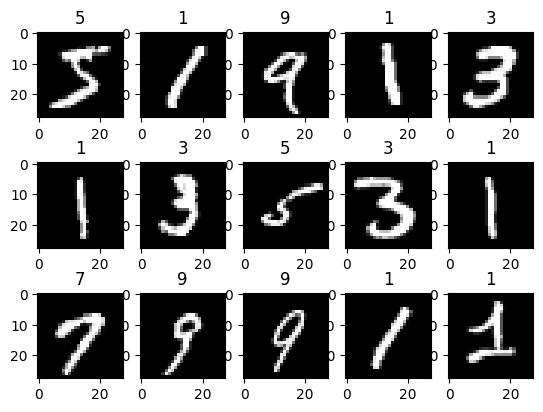

In [18]:
(trainX, trainY), (testX, testY) = load_data()
oddX = []
oddY = []
for i in range(len(trainX)):
    if trainY[i] % 2 == 1:
        oddX.append(trainX[i])
        oddY.append(trainY[i])
        
oddTestX = []
oddTestY = []
for i in range(len(testX)):
    if testY[i] % 2 == 1:
        oddX.append(testX[i])
        oddY.append(testY[i])

trainX = oddX
trainY = oddY

testX = oddTestX
testY = oddTestY



# Dispaly some loaded image data
display_img(trainX[:15], trainY[:15])   


### Prepare datasets

In [19]:
trainX = np.expand_dims(trainX, axis = -1)
testX = np.expand_dims(testX, axis = -1)

# Investigate updated x
# print('trainX.shape: {}, testX.shape: {})'.format(trainX.shape, testX.shape))
# print('trainX.dtype: {}, testX.dtype: {}'.format(trainX.dtype, testX.dtype))
# print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)

# Investigate updated y
# print('trainY.shape: {}, testY.shape: {})'.format(trainY.shape, testY.shape))
# print('trainY.dtype: {}, testX.dtype: {}'.format(trainY.dtype, testY.dtype))
print(trainY[:5])


[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [20]:
trainX = trainX.astype("float32") / 255
testX = testX.astype("float32") / 255


### Build a fully connected neural network

In [21]:
inputs = Input((28, 28, 1), name = 'InputLayer')
x = Flatten()(inputs)
x = Dense(128, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(512, activation = 'relu')(x)
outputs = Dense(10, name = 'OutputLayer', activation = 'softmax')(x)
model = Model(inputs, outputs, name = 'Multi-Class-Classifier')
model.summary()

Model: "Multi-Class-Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 270,218 (1.03 MB)

 Trainable params: 270,218 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

### Train classifier

In [22]:
model.compile(optimizer="rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainX, trainY, batch_size = 128, validation_split = 0.1, epochs = 10)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8513 - loss: 0.4151 - val_accuracy: 0.9778 - val_loss: 0.0685
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9760 - loss: 0.0758 - val_accuracy: 0.9879 - val_loss: 0.0444
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9843 - loss: 0.0486 - val_accuracy: 0.9857 - val_loss: 0.0410
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9897 - loss: 0.0329 - val_accuracy: 0.9829 - val_loss: 0.0535
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9911 - loss: 0.0268 - val_accuracy: 0.9868 - val_loss: 0.0425
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9940 - loss: 0.0174 - val_accuracy: 0.9899 - val_loss: 0.0303
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9962 - loss: 0.0122 - val_accuracy: 0.9916 - val_loss: 0.0300
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9979 - loss: 0.0075 - val_accuracy: 0.

### Test the performance of the model

In [24]:
# Evaluate the model
model.evaluate(testX, testY)

# Predict
predictY = model.predict(testX)

# Compare predictions
print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
  print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))


ValueError: as_list() is not defined on an unknown TensorShape.

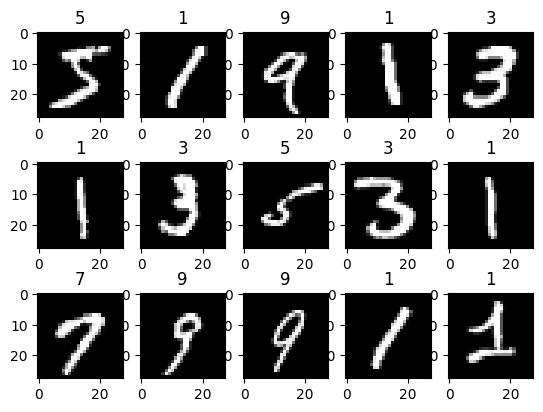

Model: "Multi-Class-Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 270,218 (1.03 MB)

 Trainable params: 270,218 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8431 - loss: 0.4501 - val_accuracy: 0.9774 - val_loss: 0.0729
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9723 - loss: 0.0884 - val_accuracy: 0.9810 - val_loss: 0.0582
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9832 - loss: 0.0550 - val_accuracy: 0.9820 - val_loss: 0.0640
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9891 - loss: 0.0372 - val_accuracy: 0.9803 - val_loss: 0.0733
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9905 - loss: 0.0269 - val_accuracy: 0.9823 - val_loss: 0.0695
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9938 - loss: 0.0199 - val_accuracy: 0.9885 - val_loss: 0.0393
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9956 - loss: 0.0144 - val_accuracy: 0.9823 - val_loss: 0.0772
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9962 - loss: 0.0114 - val_accuracy: 0.

In [25]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

def display_img(img_set, title_set):
    n = len(title_set)
    for i in range(n):
        plt.subplot(3, 5, i + 1)
        plt.imshow(img_set[i], cmap='gray')
        plt.title(title_set[i])
    plt.show()
    plt.close()

# Load MNIST data
(trainX, trainY), (testX, testY) = load_data()

# Filter for odd digits in training set
oddX = []
oddY = []
for i in range(len(trainX)):
    if trainY[i] % 2 == 1:
        oddX.append(trainX[i])
        oddY.append(trainY[i])

# Filter for odd digits in test set (FIXED HERE)
oddTestX = []
oddTestY = []
for i in range(len(testX)):
    if testY[i] % 2 == 1:
        oddTestX.append(testX[i])
        oddTestY.append(testY[i])

# Assign filtered data
trainX = np.array(oddX)
trainY = np.array(oddY)
testX = np.array(oddTestX)
testY = np.array(oddTestY)

# Display samples
display_img(trainX[:15], trainY[:15])

# Reshape input for model
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)

# Normalize pixel values
trainX = trainX.astype("float32") / 255
testX = testX.astype("float32") / 255

# One-hot encode the labels (still use 10 outputs for consistency)
trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)

# Build a simple fully connected model
inputs = Input((28, 28, 1), name='InputLayer')
x = Flatten()(inputs)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(10, activation='softmax', name='OutputLayer')(x)
model = Model(inputs, outputs, name='Multi-Class-Classifier')

# Compile and train
model.summary()
model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, batch_size=128, validation_split=0.1, epochs=10)

# Evaluate on test set
loss, accuracy = model.evaluate(testX, testY)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Predict and compare some results
predictY = model.predict(testX)

print('\nOriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
    print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))
